# Pressemitteilungden der Bundesministerien
Initiale Exploration der Daten und Zahlen aus der Sammlung von Pressemitteilungen und anderen Meldungen von 15 Bundesministerien und der Bundesregierung.
Datenverfügbarkeit überwiegend für die aktuelle Legislaturperiode (2021-2025).

In [1]:
import re
import locale
from datetime import date, datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

/tmp/ipykernel_176261/1962116972.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_excel('../data/texts/pressemeldungen.xlsx')
df['date'] = pd.to_datetime(df['date'])
df = df.replace({np.nan: None, pd.NaT: None})

In [3]:
df.head()

,Unnamed: 0,ministry,li,raw_date,descriptor,title,file,src,contains_klima,contains_\bklima\b,contains_\bklimawandel\b,contains_\bklimaschutz\b,date
0,0,AA,0,23.01.2024,Artikel,Aktuelle reisemedizinische Hinweise,../data/texts/AA/AA_0000.txt,../data/raw/articles_aa.jsonl,None,None,None,None,2024-01-23 00:00:00
1,1,AA,1,22.01.2024,Artikel,Außenministerin Baerbock beim EU -Rat in Brüss...,../data/texts/AA/AA_0001.txt,../data/raw/articles_aa.jsonl,None,None,None,None,2024-01-22 00:00:00
2,2,AA,2,22.01.2024,Artikel,Öffentliche Auftragsvergaben,../data/texts/AA/AA_0002.txt,../data/raw/articles_aa.jsonl,None,None,None,None,2024-01-22 00:00:00
3,3,AA,3,19.01.2024,Artikel,Kuwait: Steckbrief,../data/texts/AA/AA_0003.txt,../data/raw/articles_aa.jsonl,None,None,None,None,2024-01-19 00:00:00
4,4,AA,4,19.01.2024,Artikel,Solange wie nötig: Deutschlands Unterstützung ...,../data/texts/AA/AA_0004.txt,../data/raw/articles_aa.jsonl,None,None,None,None,2024-01-19 00:00:00


## Zahlen gesamt

In [13]:
k = 'contains_\\bklima\\b'
print(f"Meldungen in denen 'Klima' (einzeln) auftaucht: {df[df[k] == 'x'].shape[0]:,}")
print(f"Meldungen in denen 'Klima' auftaucht: {df[df['contains_klima'] == 'x'].shape[0]:,}")
k = 'contains_\\bklimawandel\\b'
print(f"Meldungen in denen 'Klimawandel' auftaucht: {df[df[k] == 'x'].shape[0]:,}")
k = 'contains_\\bklimaschutz\\b'
print(f"Meldungen in denen 'Klimaschutz' auftaucht: {df[df[k] == 'x'].shape[0]:,}")
print(f"Meldungen gesamt: {df.shape[0]:,}")
print()
print('----')
print()
tmp = []
for mnstry in df['ministry'].unique():
    sub = df[df['ministry'] == mnstry]
    c0 = sub[sub['contains_\\bklima\\b'] == 'x'].shape[0]
    c1 = sub[sub['contains_klima'] == 'x'].shape[0]
    c2 = sub[sub['contains_\\bklimawandel\\b'] == 'x'].shape[0]
    c3 = sub[sub['contains_\\bklimaschutz\\b'] == 'x'].shape[0]
    tmp.append({'m': mnstry, 'total': sub.shape[0], 'klima': c1, 'bklima': c0, 'ks': c3, 'kw': c2})
    print(
        f"{sub.shape[0]:,} Artikel von {mnstry}, davon {c1:,} mit 'Klima', {c0:} mit 'Klima' (einzeln), {c2} mit 'Klimawandel', und {c3} mit 'Klimaschutz'")
dfc = pd.DataFrame(tmp)
dfc['klima%'] = dfc['klima'] / dfc['total']
dfc['bklima%'] = dfc['bklima'] / dfc['total']
dfc['ks%'] = dfc['ks'] / dfc['total']
dfc['kw%'] = dfc['kw'] / dfc['total']
dfc

Meldungen in denen 'Klima' (einzeln) auftaucht: 2,152
Meldungen in denen 'Klima' auftaucht: 7,852
Meldungen in denen 'Klimawandel' auftaucht: 1,723
Meldungen in denen 'Klimaschutz' auftaucht: 4,301
Meldungen gesamt: 29,807

----

327 Artikel von AA, davon 76 mit 'Klima', 28 mit 'Klima' (einzeln), 18 mit 'Klimawandel', und 25 mit 'Klimaschutz'
6,882 Artikel von BMUV_ARCHIVE, davon 2,979 mit 'Klima', 795 mit 'Klima' (einzeln), 650 mit 'Klimawandel', und 1872 mit 'Klimaschutz'
1,652 Artikel von BMBF, davon 328 mit 'Klima', 120 mit 'Klima' (einzeln), 118 mit 'Klimawandel', und 106 mit 'Klimaschutz'
1,975 Artikel von BMWK, davon 1,110 mit 'Klima', 179 mit 'Klima' (einzeln), 58 mit 'Klimawandel', und 775 mit 'Klimaschutz'
425 Artikel von BMF, davon 88 mit 'Klima', 18 mit 'Klima' (einzeln), 11 mit 'Klimawandel', und 43 mit 'Klimaschutz'
354 Artikel von BMEL, davon 200 mit 'Klima', 98 mit 'Klima' (einzeln), 19 mit 'Klimawandel', und 76 mit 'Klimaschutz'
1,913 Artikel von BMFSFJ, davon 49 mit '

,m,total,klima,bklima,ks,kw,klima%,bklima%,ks%,kw%
0,AA,327,76,28,25,18,0.232416,0.085627,0.076453,0.055046
1,BMUV_ARCHIVE,6882,2979,795,1872,650,0.432868,0.115519,0.272014,0.094449
2,BMBF,1652,328,120,106,118,0.198547,0.072639,0.064165,0.071429
3,BMWK,1975,1110,179,775,58,0.562025,0.090633,0.392405,0.029367
4,BMF,425,88,18,43,11,0.207059,0.042353,0.101176,0.025882
5,BMEL,354,200,98,76,19,0.564972,0.276836,0.214689,0.053672
6,BMFSFJ,1913,49,15,8,13,0.025614,0.007841,0.004182,0.006796
7,BMZ_CURRENT,371,224,96,95,118,0.603774,0.258760,0.256065,0.318059
8,BMUV_CURRENT,432,302,123,174,60,0.699074,0.284722,0.402778,0.138889
9,BMVG,514,11,2,6,0,0.021401,0.003891,0.011673,0.000000


## Meldungen seit Dezember 2021

In [15]:
# Filtering
df['grp'] = [i.strftime('%Y-%m') if i else None for i in df['date']]
dff = df[df['grp'] >= '2021-12']

In [16]:
k = 'contains_\\bklima\\b'
print(f"Meldungen in denen 'Klima' (einzeln) auftaucht: {dff[dff[k] == 'x'].shape[0]:,}")
print(f"Meldungen in denen 'Klima' auftaucht: {dff[dff['contains_klima'] == 'x'].shape[0]:,}")
k = 'contains_\\bklimawandel\\b'
print(f"Meldungen in denen 'Klimawandel' auftaucht: {dff[dff[k] == 'x'].shape[0]:,}")
k = 'contains_\\bklimaschutz\\b'
print(f"Meldungen in denen 'Klimaschutz' auftaucht: {dff[dff[k] == 'x'].shape[0]:,}")
print(f"Meldungen gesamt: {dff.shape[0]:,}")
print()
print('----')
print()
tmp = []
for mnstry in dff['ministry'].unique():
    sub = dff[dff['ministry'] == mnstry]
    c0 = sub[sub['contains_\\bklima\\b'] == 'x'].shape[0]
    c1 = sub[sub['contains_klima'] == 'x'].shape[0]
    c2 = sub[sub['contains_\\bklimawandel\\b'] == 'x'].shape[0]
    c3 = sub[sub['contains_\\bklimaschutz\\b'] == 'x'].shape[0]
    tmp.append({'m': mnstry, 'total': sub.shape[0], 'klima': c1, 'bklima': c0, 'ks': c3, 'kw': c2})
    print(
        f"{sub.shape[0]:,} Artikel von {mnstry}, davon {c1:,} mit 'Klima', {c0:} mit 'Klima' (einzeln), {c2} mit 'Klimawandel', und {c3} mit 'Klimaschutz'")

dffc = pd.DataFrame(tmp)
dffc['klima%'] = dffc['klima'] / dffc['total']
dffc['bklima%'] = dffc['bklima'] / dffc['total']
dffc['ks%'] = dffc['ks'] / dffc['total']
dffc['kw%'] = dffc['kw'] / dffc['total']
dffc

Meldungen in denen 'Klima' (einzeln) auftaucht: 631
Meldungen in denen 'Klima' auftaucht: 2,240
Meldungen in denen 'Klimawandel' auftaucht: 358
Meldungen in denen 'Klimaschutz' auftaucht: 1,262
Meldungen gesamt: 5,951

----

315 Artikel von AA, davon 73 mit 'Klima', 27 mit 'Klima' (einzeln), 18 mit 'Klimawandel', und 24 mit 'Klimaschutz'
186 Artikel von BMBF, davon 43 mit 'Klima', 11 mit 'Klima' (einzeln), 11 mit 'Klimawandel', und 17 mit 'Klimaschutz'
1,016 Artikel von BMWK, davon 852 mit 'Klima', 134 mit 'Klima' (einzeln), 40 mit 'Klimawandel', und 675 mit 'Klimaschutz'
173 Artikel von BMF, davon 47 mit 'Klima', 12 mit 'Klima' (einzeln), 5 mit 'Klimawandel', und 21 mit 'Klimaschutz'
354 Artikel von BMEL, davon 200 mit 'Klima', 98 mit 'Klima' (einzeln), 19 mit 'Klimawandel', und 76 mit 'Klimaschutz'
199 Artikel von BMFSFJ, davon 13 mit 'Klima', 1 mit 'Klima' (einzeln), 4 mit 'Klimawandel', und 3 mit 'Klimaschutz'
371 Artikel von BMZ_CURRENT, davon 224 mit 'Klima', 96 mit 'Klima' (einz

,m,total,klima,bklima,ks,kw,klima%,bklima%,ks%,kw%
0,AA,315,73,27,24,18,0.231746,0.085714,0.076190,0.057143
1,BMBF,186,43,11,17,11,0.231183,0.059140,0.091398,0.059140
2,BMWK,1016,852,134,675,40,0.838583,0.131890,0.664370,0.039370
3,BMF,173,47,12,21,5,0.271676,0.069364,0.121387,0.028902
4,BMEL,354,200,98,76,19,0.564972,0.276836,0.214689,0.053672
5,BMFSFJ,199,13,1,3,4,0.065327,0.005025,0.015075,0.020101
6,BMZ_CURRENT,371,224,96,95,118,0.603774,0.258760,0.256065,0.318059
7,BMUV_CURRENT,409,281,115,160,52,0.687042,0.281174,0.391198,0.127139
8,BMVG,237,9,2,4,0,0.037975,0.008439,0.016878,0.000000
9,BMG,100,8,2,3,4,0.080000,0.020000,0.030000,0.040000


## Grafiken

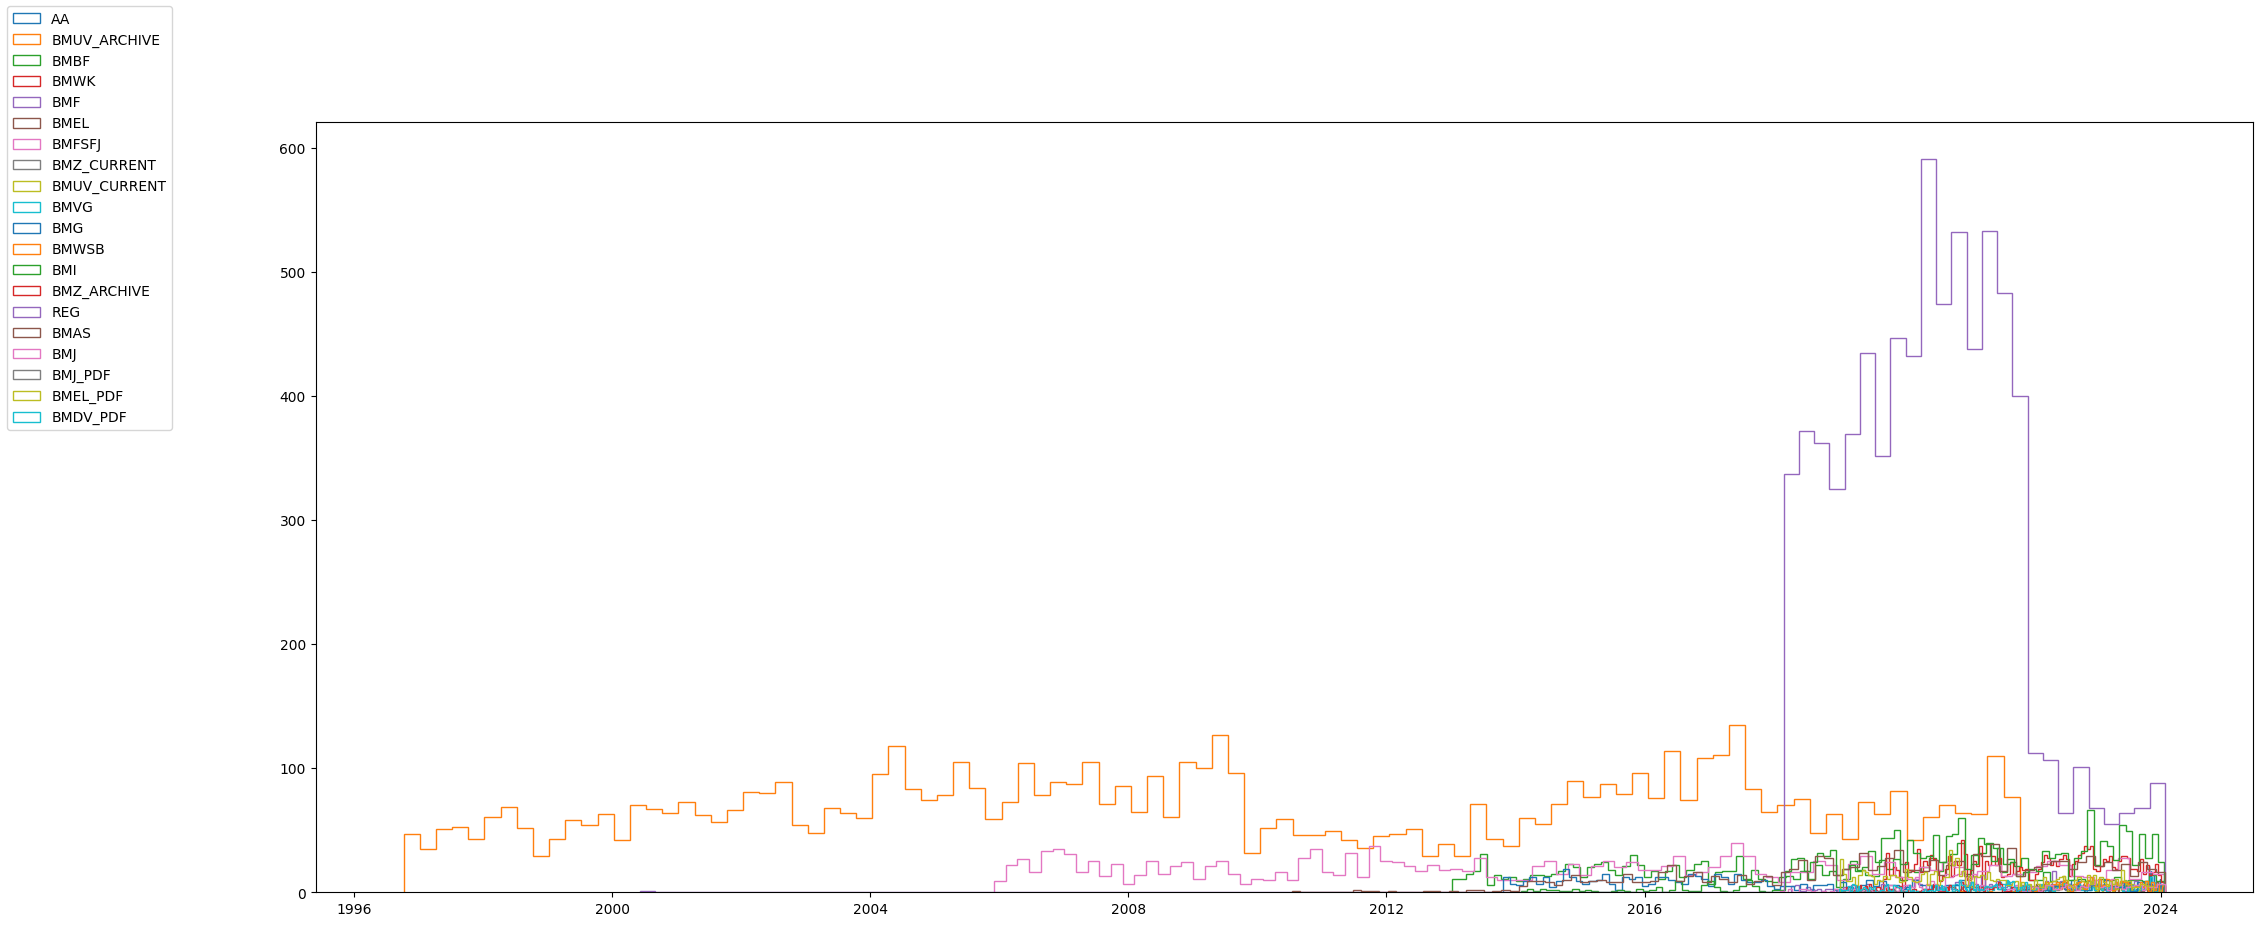

In [7]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(25, 10))
for mnstry in df['ministry'].unique():
    ax.hist(df[df['ministry'] == mnstry]['date'], label=mnstry, bins=100, histtype='step')
fig.legend(loc='upper left')

array([[<Axes: title={'center': 'AA'}>, <Axes: title={'center': 'BMAS'}>,
        <Axes: title={'center': 'BMBF'}>,
        <Axes: title={'center': 'BMDV_PDF'}>],
       [<Axes: title={'center': 'BMEL'}>,
        <Axes: title={'center': 'BMEL_PDF'}>,
        <Axes: title={'center': 'BMF'}>,
        <Axes: title={'center': 'BMFSFJ'}>],
       [<Axes: title={'center': 'BMG'}>, <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'BMJ'}>,
        <Axes: title={'center': 'BMJ_PDF'}>],
       [<Axes: title={'center': 'BMUV_ARCHIVE'}>,
        <Axes: title={'center': 'BMUV_CURRENT'}>,
        <Axes: title={'center': 'BMVG'}>,
        <Axes: title={'center': 'BMWK'}>],
       [<Axes: title={'center': 'BMWSB'}>,
        <Axes: title={'center': 'BMZ_ARCHIVE'}>,
        <Axes: title={'center': 'BMZ_CURRENT'}>,
        <Axes: title={'center': 'REG'}>]], dtype=object)

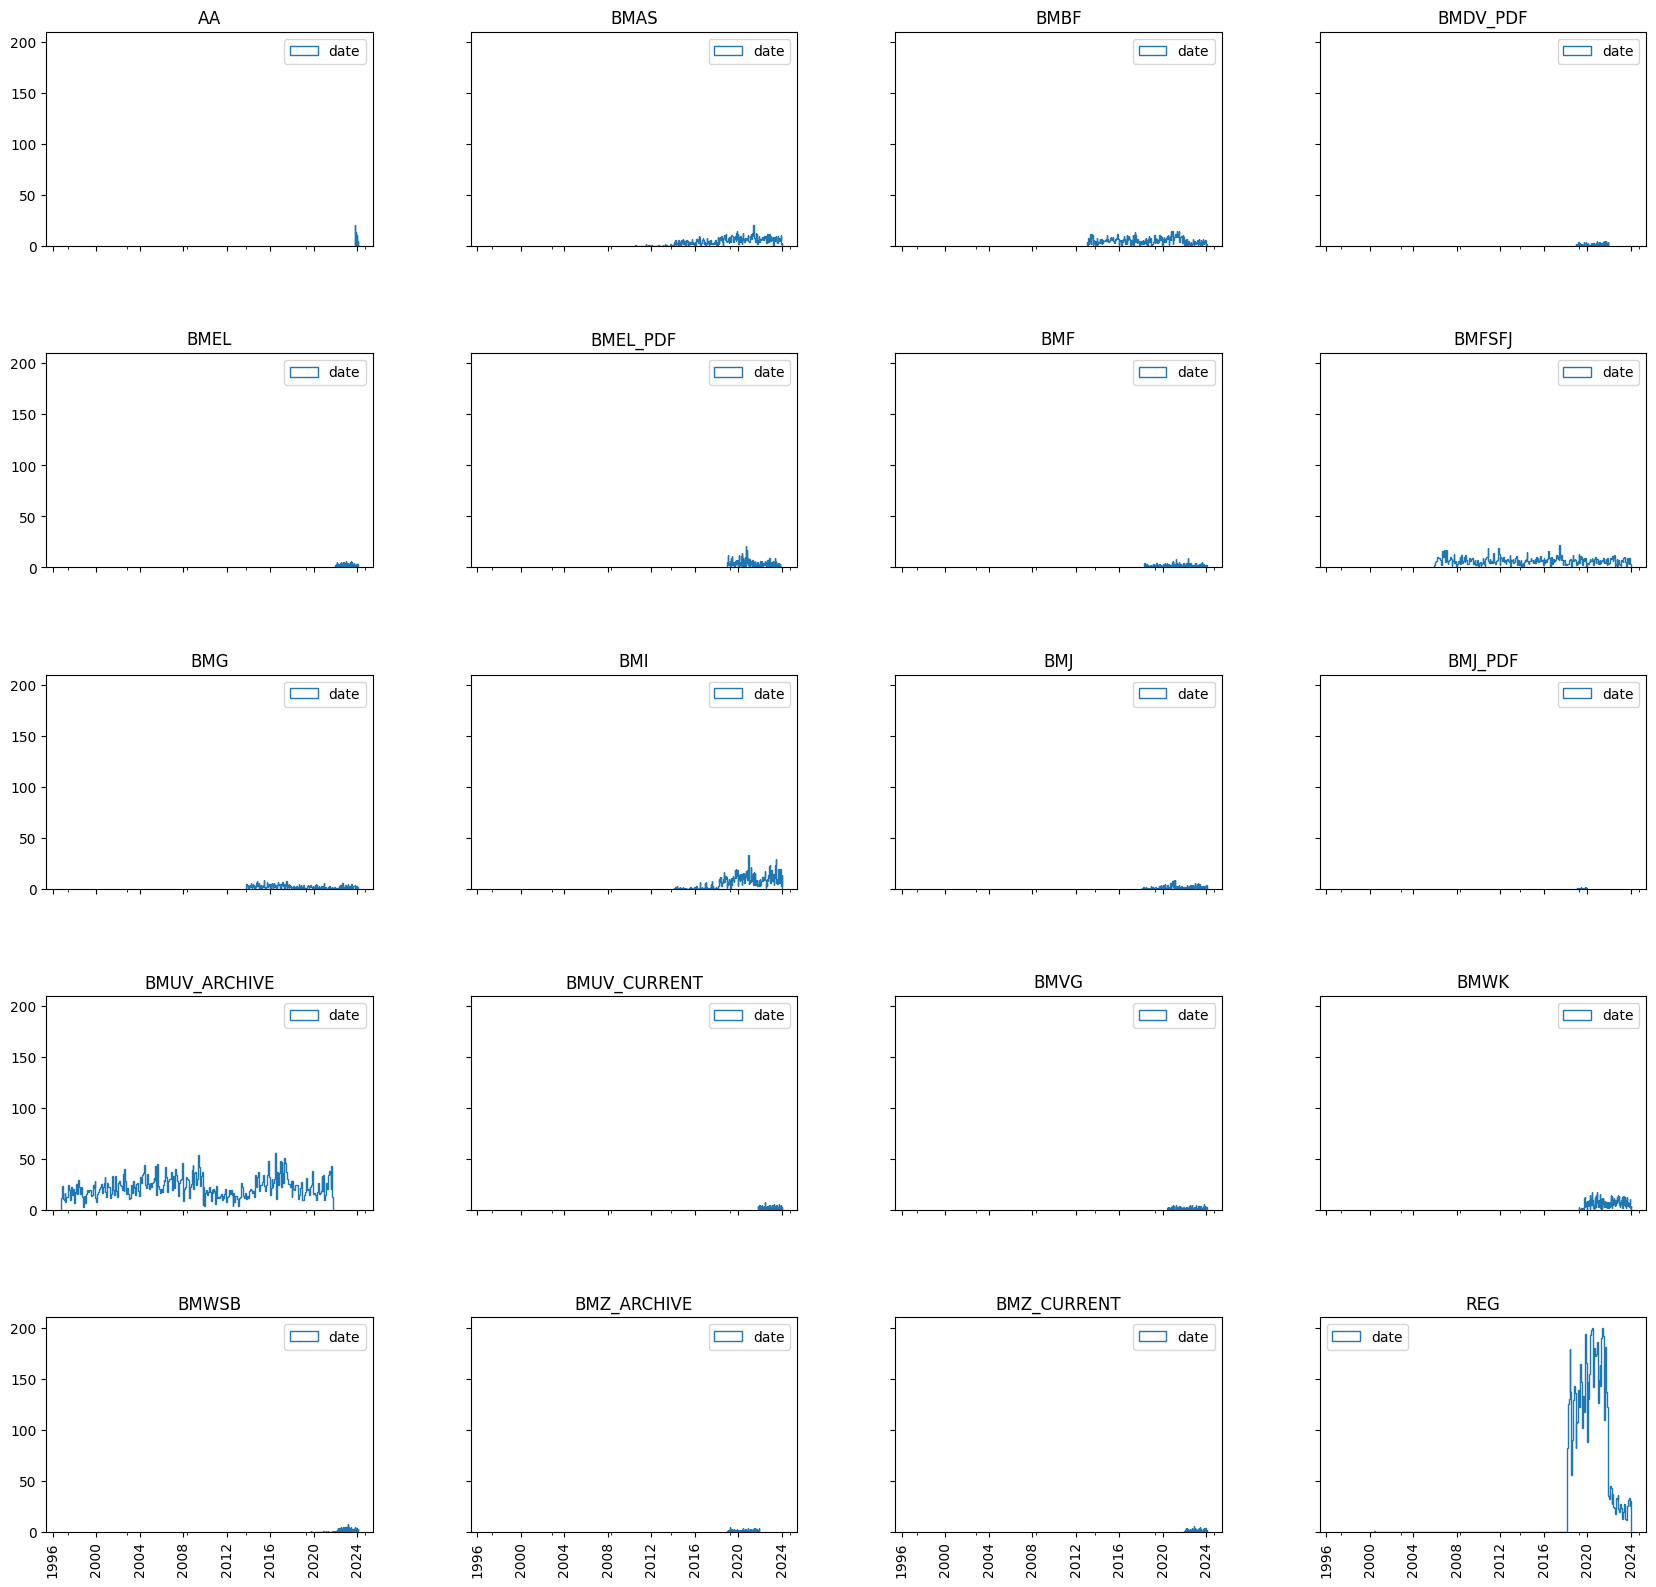

In [8]:
df.hist('date', by='ministry', histtype='step', bins=300, legend=True, sharex=True, sharey=True, figsize=(20, 20))

### Artikel zu Klima vs. alle Artikel über Zeit

#### Aktuelle Legislatur

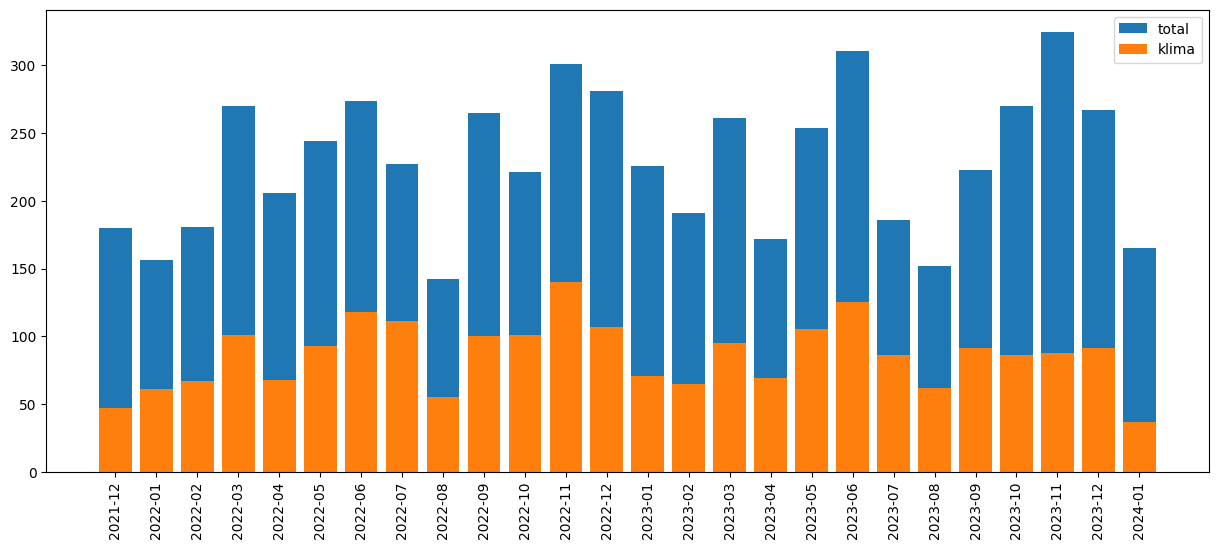

In [17]:
df['grp'] = [i.strftime('%Y-%m') if i else None for i in df['date']]
cnts = df[df['grp'] >= '2021-12'].groupby('grp').count()

plt.figure(figsize=(15, 6))
plt.bar(cnts.index, cnts['ministry'], label='total')
plt.bar(cnts.index, cnts['contains_klima'], label='klima')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [18]:
cnts

,Unnamed: 0,ministry,li,raw_date,descriptor,title,file,src,contains_klima,contains_\bklima\b,contains_\bklimawandel\b,contains_\bklimaschutz\b,date
grp,,,,,,,,,,,,,
2021-12,180,180,180,180,172,179,180,180,47,11,4,30,180
2022-01,156,156,156,156,153,155,156,156,61,21,8,32,156
2022-02,181,181,181,181,176,181,181,181,67,25,10,43,181
2022-03,270,270,270,270,261,258,270,270,101,31,12,58,270
2022-04,206,206,206,206,197,204,206,206,68,16,4,36,206
2022-05,244,244,244,244,232,243,244,244,93,15,23,60,244
2022-06,274,274,274,274,263,271,274,274,118,27,10,63,274
2022-07,227,227,227,227,219,222,227,227,111,40,18,55,227
2022-08,142,142,142,142,134,141,142,142,55,16,4,33,142


#### Of all time

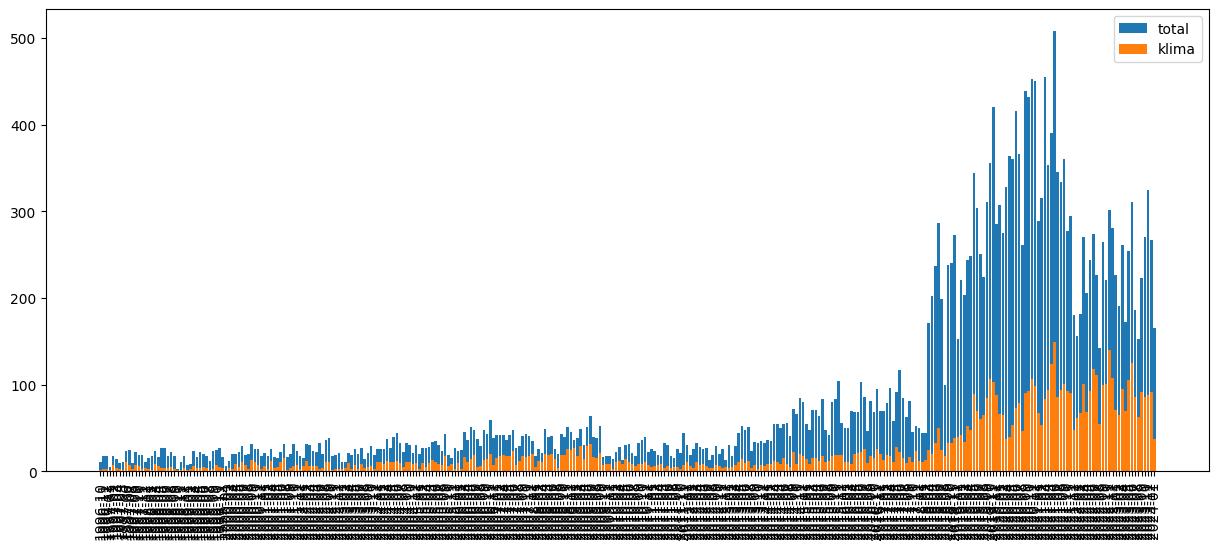

In [19]:
df['grp'] = [i.strftime('%Y-%m') if i else None for i in df['date']]
cnts = df.groupby('grp').count()

plt.figure(figsize=(15, 6))
plt.bar(cnts.index, cnts['ministry'], label='total')
plt.bar(cnts.index, cnts['contains_klima'], label='klima')
plt.legend()
plt.xticks(rotation=90)
plt.show()

### Artikel pro Ministerium

#### Aktuelle Legislatur

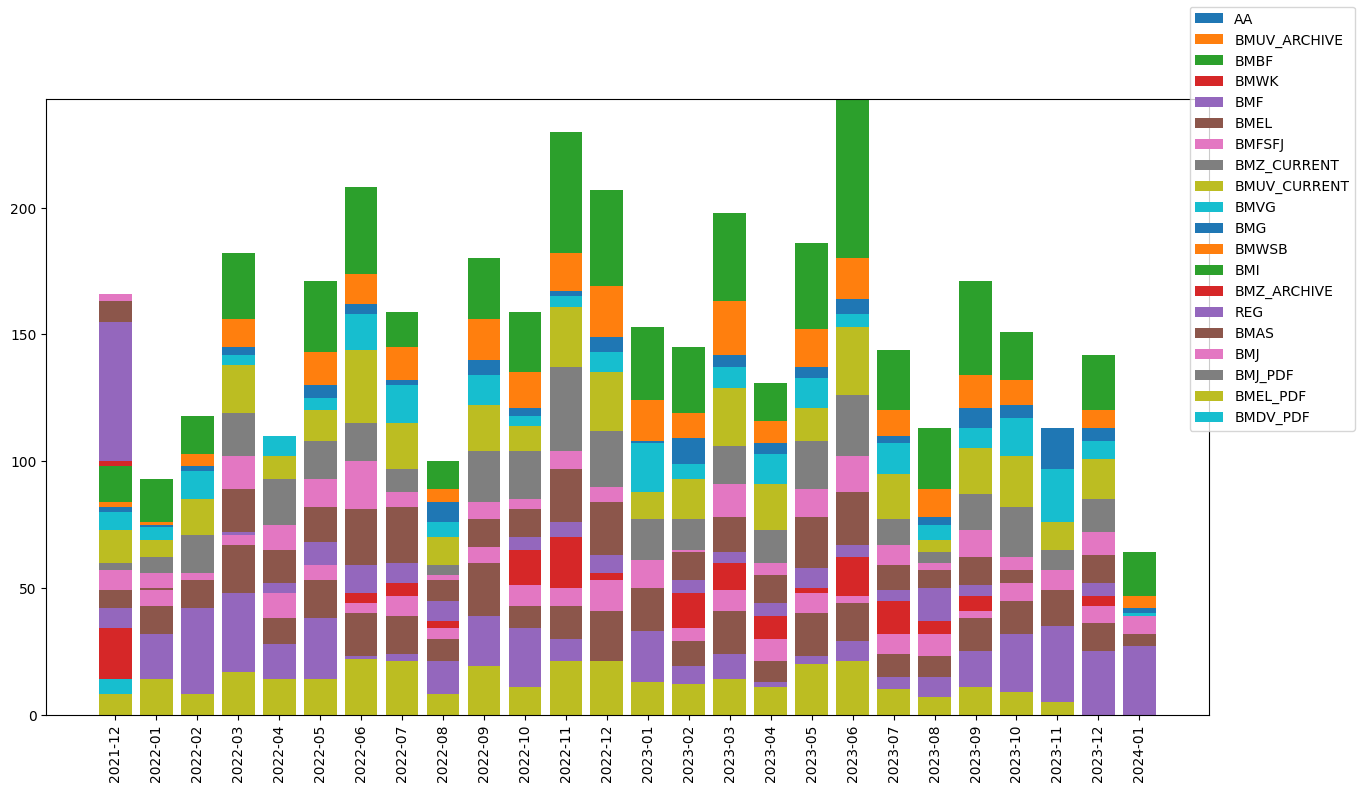

In [22]:
df['grp'] = [i.strftime('%Y-%m') if i else None for i in df['date']]
basefilter = df['grp'] >= '2021-12'
fig = plt.figure(figsize=(15, 8))
base = df[basefilter].groupby('grp').count()['ministry'] - df[basefilter].groupby('grp').count()['ministry']

for m in df['ministry'].unique():
    cnts = df[basefilter & (df['ministry'] == m)].groupby('grp').count()
    bars = cnts['ministry'] + base - base
    plt.bar(bars.index, bars, label=m, bottom=base)
    base += cnts['ministry']
    base.replace({np.nan: 0, pd.NaT: 0}, inplace=True)
plt.xticks(rotation=90)
fig.legend(loc='outside right upper')
plt.show(fig)

#### Of all time

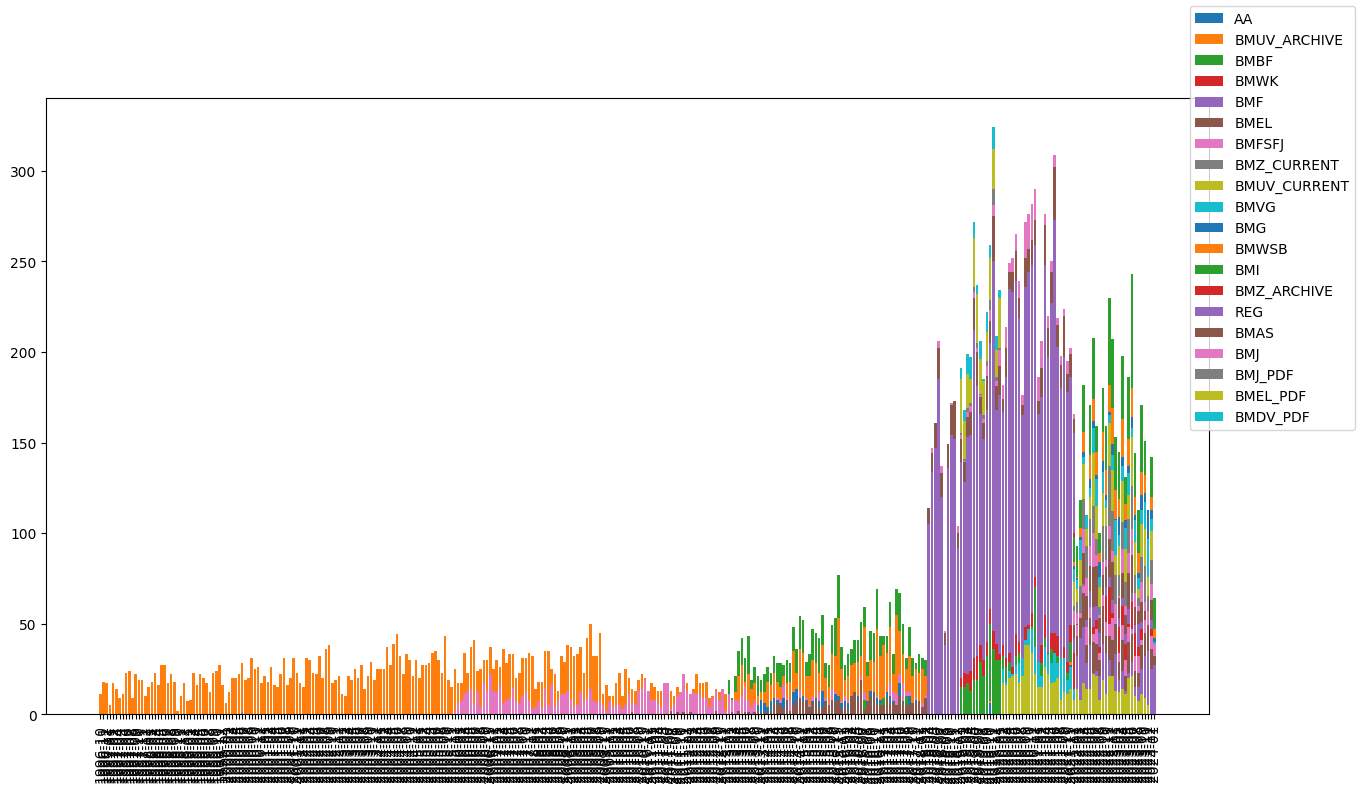

In [23]:
df['grp'] = [i.strftime('%Y-%m') if i else None for i in df['date']]
fig = plt.figure(figsize=(15, 8))
base = df.groupby('grp').count()['ministry'] - df.groupby('grp').count()['ministry']

for m in df['ministry'].unique():
    cnts = df[df['ministry'] == m].groupby('grp').count()
    bars = cnts['ministry'] + base - base
    plt.bar(bars.index, bars, label=m, bottom=base)
    base += cnts['ministry']
    base.replace({np.nan: 0, pd.NaT: 0}, inplace=True)
plt.xticks(rotation=90)
fig.legend(loc='outside right upper')
plt.show(fig)